In [1]:
ls

 Volume in drive D is DATA
 Volume Serial Number is 9CEC-921D

 Directory of d:\ML\Google colab\stock all

04/05/2024  09:27 PM    <DIR>          .
04/08/2024  12:05 PM    <DIR>          ..
04/05/2024  09:27 PM                 0 stock.ipynb
               1 File(s)              0 bytes
               2 Dir(s)  119,931,219,968 bytes free


In [22]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("bank.csv")
df
df.set_index('Datetime', inplace=True)
df.fillna(method="ffill", inplace=True)	
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
lookback_window = 3
features = 5
def create_sequences(data, lookback_window):
    X, y = [], []
    for i in range(len(data) - lookback_window - 1): 
        X.append(data[i:(i + lookback_window), :])
        y.append(data[i + lookback_window, 0:5]) 
    return np.array(X), np.array(y)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback_window, features)))
model.add(LSTM(units=50))
model.add(Dense(units=5)) 
model.compile(loss='mean_squared_error', optimizer='adam')
X, y = create_sequences(df_scaled, lookback_window)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]




model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
y_pred_original = scaler.inverse_transform(y_pred)
data = pd.DataFrame(y_pred_original, columns=['open', 'high', 'low' ,'close','tradedqty'])
data


Epoch 1/50


C:\Users\santh\AppData\Local\Temp\ipykernel_6780\1755444868.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
c:\Users\santh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.1412 - val_loss: 0.0483
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0821 - val_loss: 0.0210
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174 - val_loss: 0.0311
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - val_loss: 0.0222
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052 - val_loss: 0.0183
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - val_loss: 0.0220
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - val_loss: 0.0199
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 - val_loss: 0.0187
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - val_loss: 0.0193
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - val_loss: 0.0183
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - val_loss: 0.0176
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - val_loss: 0.0176

,open,high,low,close,tradedqty
0,197.510147,203.427719,193.275375,196.470276,260291.37500
1,207.666046,214.759460,202.895218,206.378998,360907.87500
2,210.478119,219.823776,205.764236,211.386047,415359.28125
3,202.326309,211.488312,198.154297,204.650146,347883.40625
4,190.916763,198.807205,187.466721,192.661026,282910.40625
...,...,...,...,...,...
70,211.147125,218.004303,206.049728,211.397293,262828.34375
71,203.619339,211.279175,199.260605,204.881332,279797.43750
72,191.779770,200.269058,188.366028,194.082199,297804.31250
73,180.189896,188.782043,177.557251,182.474686,307948.15625


In [23]:
frequency = 'T'
start_time = '2024-01-30 14:14:00+00'
end_time = pd.to_datetime(start_time) + pd.DateOffset(minutes=len(data) - 1)
date_range = pd.date_range(start=start_time, end=end_time, freq=frequency)
data['lasttradetime'] = date_range
data.set_index('lasttradetime', inplace=True)
data.to_csv('Lstm.csv')

C:\Users\santh\AppData\Local\Temp\ipykernel_6780\90459171.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(start=start_time, end=end_time, freq=frequency)


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

print("RMSE:", rmse)



RMSE: 0.10211270831365196


In [26]:
# Inverse transform the predicted values
y_pred_original = scaler.inverse_transform(y_pred)
# Calculate MAPE using original values
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), y_pred_original)


In [27]:
print("MAPE:", mape)
RMSE: 0.10211270831365196
MAPE: 0.15758297555397976

MAPE: 0.15758297555397976


C:\Users\santh\AppData\Local\Temp\ipykernel_6780\698918904.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


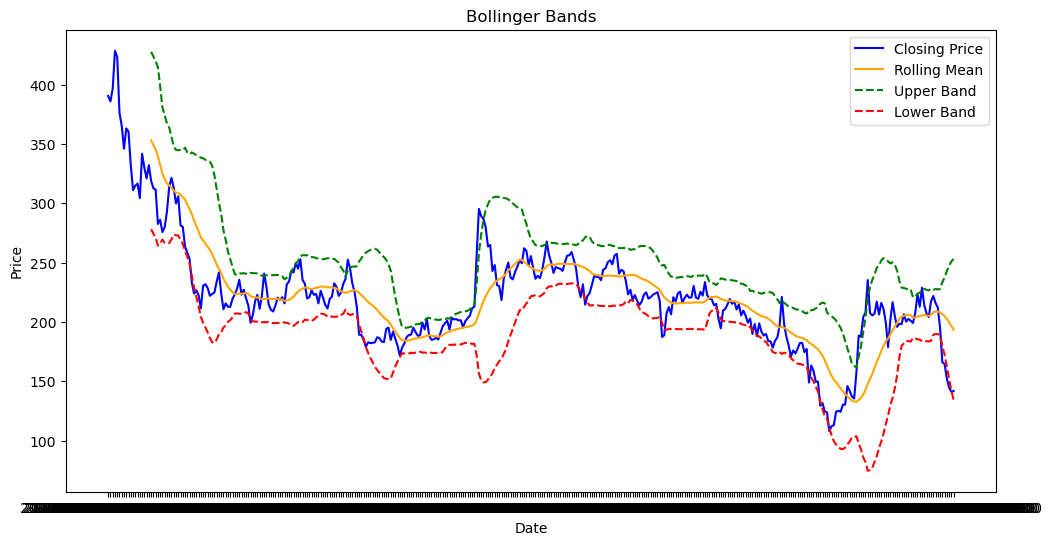

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("bank.csv")
df.set_index('Datetime', inplace=True)
df.fillna(method="ffill", inplace=True)

# Define parameters
window = 20  # Window size for calculating moving average
num_std = 2  # Number of standard deviations for upper and lower bands

# Calculate rolling mean and standard deviation
rolling_mean = df['close'].rolling(window=window).mean()
rolling_std = df['close'].rolling(window=window).std()

# Calculate upper and lower bands
upper_band = rolling_mean + (rolling_std * num_std)
lower_band = rolling_mean - (rolling_std * num_std)

# Plot closing prices and Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Closing Price', color='blue')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean', color='orange')
plt.plot(upper_band.index, upper_band, label='Upper Band', color='green', linestyle='--')
plt.plot(lower_band.index, lower_band, label='Lower Band', color='red', linestyle='--')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


C:\Users\santh\AppData\Local\Temp\ipykernel_10908\1815343430.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


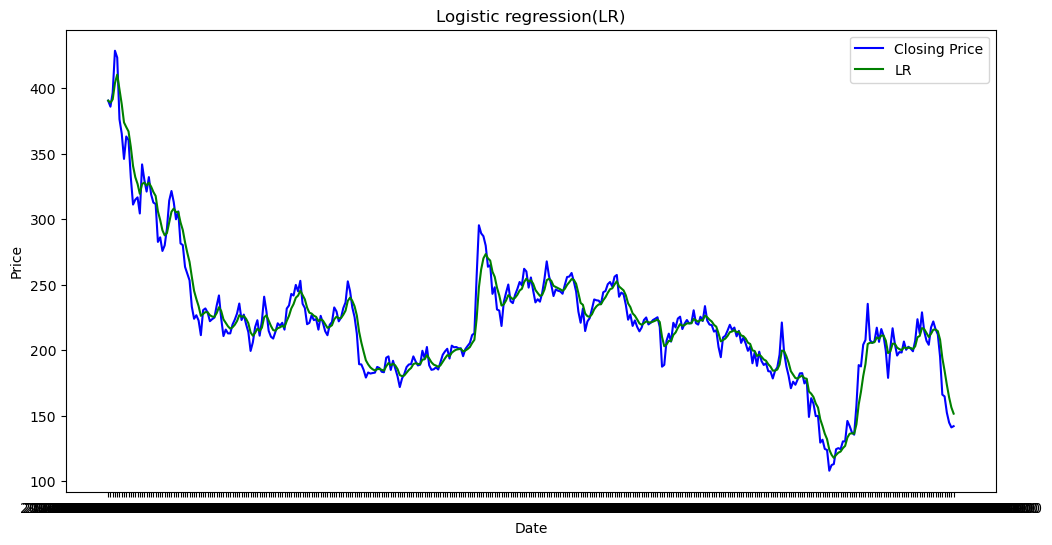

Root Mean Squared Error (RMSE) for EMA: 9.516030990723358
Mean Absolute Percentage Error (MAPE) for EMA: 3.154945304626098


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv("bank.csv")
df.set_index('Datetime', inplace=True)
df.fillna(method="ffill", inplace=True)

# Define parameters
span = 10  # Span for calculating EMA

# Calculate EMA
ema = df['close'].ewm(span=span, adjust=False).mean()

# Plot closing prices and EMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Closing Price', color='blue')
plt.plot(ema.index, ema, label='LR', color='green')
plt.title('Logistic regression(LR)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df['close'], ema))
print("Root Mean Squared Error (RMSE) for EMA:", rmse)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(df['close'], ema)
print("Mean Absolute Percentage Error (MAPE) for EMA:", mape)


C:\Users\santh\AppData\Local\Temp\ipykernel_6780\3478740427.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


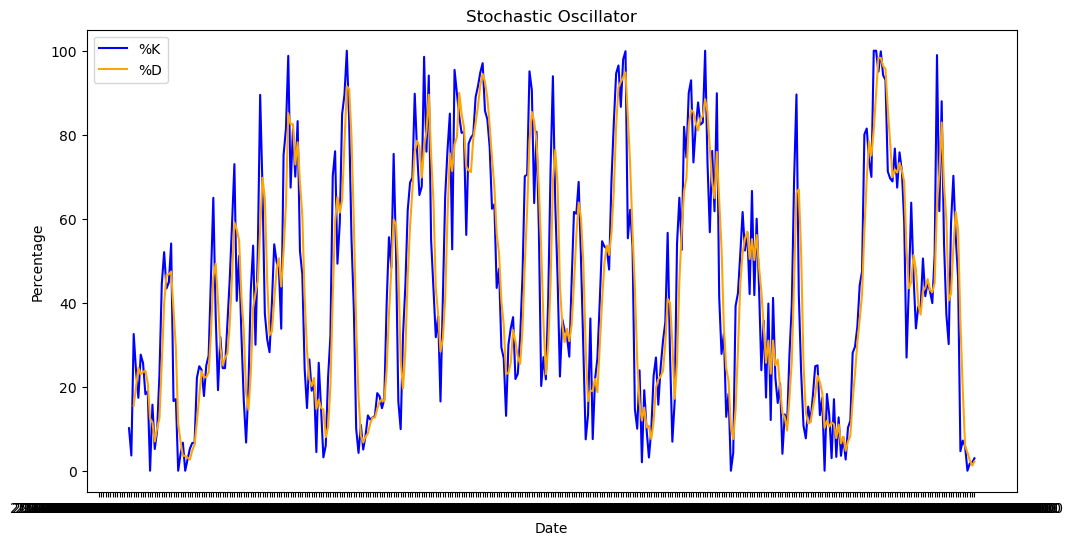

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("bank.csv")
df.set_index('Datetime', inplace=True)
df.fillna(method="ffill", inplace=True)

# Define parameters
k_period = 14  # Period for %K calculation
d_period = 3   # Period for %D calculation

# Calculate %K
lowest_low = df['low'].rolling(window=k_period).min()
highest_high = df['high'].rolling(window=k_period).max()
k_percent = ((df['close'] - lowest_low) / (highest_high - lowest_low)) * 100

# Calculate %D (simple moving average of %K)
d_percent = k_percent.rolling(window=d_period).mean()

# Plot %K and %D
plt.figure(figsize=(12, 6))
plt.plot(df.index, k_percent, label='%K', color='blue')
plt.plot(df.index, d_percent, label='%D', color='orange')
plt.title('Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()


C:\Users\santh\AppData\Local\Temp\ipykernel_6780\1245693039.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


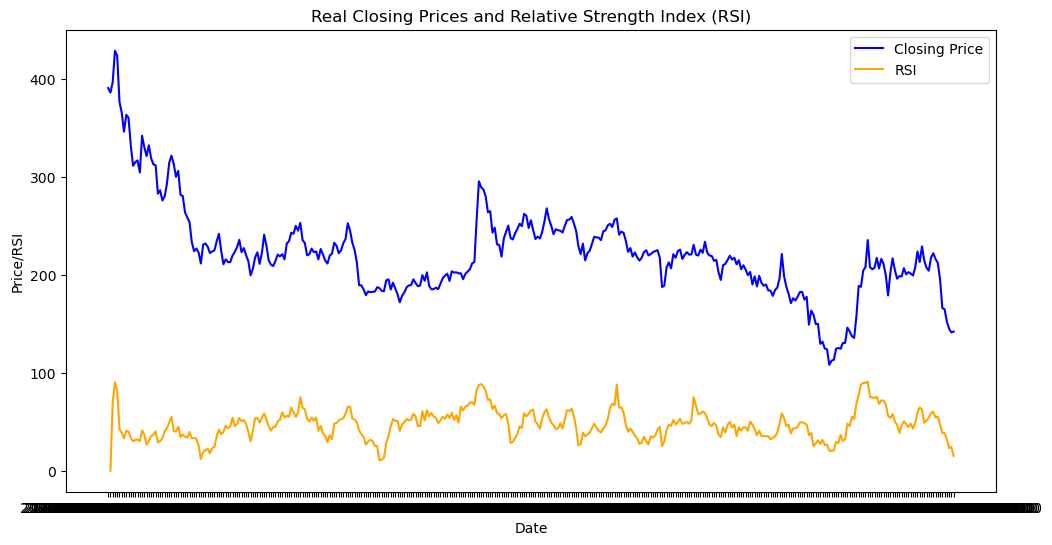

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("bank.csv")
df.set_index('Datetime', inplace=True)
df.fillna(method="ffill", inplace=True)

# Define parameters
window = 14  # Window size for calculating RSI

# Calculate price changes
delta = df['close'].diff()

# Define up and down movements
up = delta.where(delta > 0, 0)
down = -delta.where(delta < 0, 0)

# Calculate average gains and losses
avg_gain = up.rolling(window=window, min_periods=1).mean()
avg_loss = down.rolling(window=window, min_periods=1).mean()

# Calculate relative strength (RS)
rs = avg_gain / avg_loss

# Calculate RSI
rsi = 100 - (100 / (1 + rs))

# Plot real closing prices and RSI
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Closing Price', color='blue')
plt.plot(df.index, rsi, label='RSI', color='orange')
plt.title('Real Closing Prices and Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('Price/RSI')
plt.legend()
plt.show()


In [37]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv("bank.csv")
df.set_index('Datetime', inplace=True)
df.fillna(method="ffill", inplace=True)

# Define parameters
window = 14  # Window size for calculating RSI

# Calculate price changes
delta = df['close'].diff()

# Define up and down movements
up = delta.where(delta > 0, 0)
down = -delta.where(delta < 0, 0)

# Calculate average gains and losses
avg_gain = up.rolling(window=window, min_periods=1).mean()
avg_loss = down.rolling(window=window, min_periods=1).mean()

# Calculate relative strength (RS)
rs = avg_gain / avg_loss

# Calculate RSI
rsi = 100 - (100 / (1 + rs))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df['close'][window:], rsi[window:]))
print("Root Mean Squared Error (RMSE) for RSI:", rmse)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(df['close'][window:], rsi[window:])
print("Mean Absolute Percentage Error (MAPE) for RSI:", mape)


Root Mean Squared Error (RMSE) for RSI: 173.15010850890195
Mean Absolute Percentage Error (MAPE) for RSI: 77.89445587514905


C:\Users\santh\AppData\Local\Temp\ipykernel_6780\2007872829.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


Root Mean Squared Error (RMSE) for GBM: 11.515944318403399


C:\Users\santh\AppData\Local\Temp\ipykernel_6780\3121844881.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [39]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 660.6 kB/s eta 0:02:31
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:35
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:35
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:35
   ---------------------------------------- 0.1/99.8 MB 504.4 kB/s eta 0:03:18
   ---------------------------------------- 0.2/99.8 MB 618.3 kB/s eta 0:02:42
   ---------------------------------------- 0.2/99.8 MB 620.6 kB/s eta 0:02:41
   ---------------------------------------- 0.2/99.8 MB 620.6 kB/s eta 0:02:41
   ---------------------------------------- 0.2/99.8 MB 509.6 kB/s eta 0:03:16
   ---------------------------------------- 0.2/99.8 MB 509.6 kB/s eta 0:03:16
   ---------------------------------------- 0.2/99.8 MB 509.6 kB/s eta 0:03:

C:\Users\santh\AppData\Local\Temp\ipykernel_6780\1334359420.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


Root Mean Squared Error (RMSE) for GBM: 11.515944318403399
Mean Absolute Percentage Error (MAPE) for GBM: 2.337793579875704


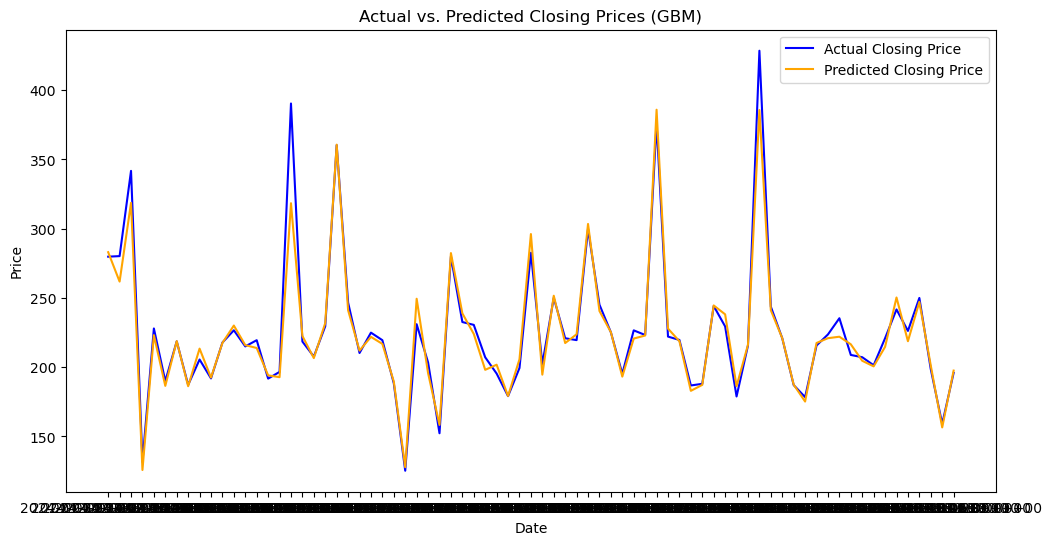

In [41]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv("bank.csv")
df.set_index('Datetime', inplace=True)
df.fillna(method="ffill", inplace=True)

# Feature engineering (if needed)
# For example, you might want to create lag features, moving averages, or other indicators

# Define features and target variable
X = df.drop(columns=['close'])  # Features
y = df['close']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) for GBM:", rmse)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE) for GBM:", mape)

# Plot real and predicted data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Closing Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Closing Price', color='orange')
plt.title('Actual vs. Predicted Closing Prices (GBM)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
